In [1]:
import eilnn
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log
from samples import particles
import sys
import cc3d
import tensorflow as tf

In [2]:
config = particles.ParticlesConfig()
subset = 'pristine_abs_3'
ROOT_DIR = os.path.abspath('C:/Users/Sohrab/Documents/crack/EILNet_tf2/')
sys.path.append(ROOT_DIR)
PARTICLE_DIR = os.path.join(ROOT_DIR, 'images',subset)
COCO_MODEL_PATH = 'C:/Users/Sohrab/Documents/crack/EILNet/mask_rcnn_coco.h5'

class InferenceConfig(config.__class__):
    GPU_COUNT = 1
    IMAGES_PER_GPU =1
    IMAGE_RESIZE_MODE = 'square'
    IMAGE_MIN_DIM = 768
    IMAGE_MAX_DIM = 1024
    LEARNING_RATE = 0.0001
    LEARNING_MOMENTUM = 0.9
    USE_MINI_MASK = False
    BATCH_SIZE=1
    VALIDATION_STEPS = 100
    NUM_CLASSES = 2
    
config_inference= InferenceConfig()
DEVICE = '/GPU:0'
TEST_MODE = 'inference'
def get_ax(rows=1, cols=1, size=16):
    _, ax = plt.subplots(rows,cols,figsize=(size*cols,size*rows))
    return ax
with tf.device(DEVICE):
    #changelogs
    model = modellib.MaskRCNN(mode='inference', config = config_inference, model_dir = 'C:/Users/Sohrab/Documents/crack/EILNet_tf2/logs')
model.load_weights(os.path.join(ROOT_DIR, 'C:/Users/Sohrab/Documents/crack/EILNet_tf2/logs/particles20220401T1334/mask_rcnn_particles_0450.h5'), by_name=True)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Re-starting from epoch 450


Loading images in: C:\Users\Sohrab\Documents\crack\EILNet_tf2\images\pristine_abs_3
Stack Dimensions  (201, 690, 603, 3)


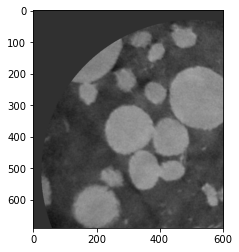

In [3]:
##### segm = eilnn.Segment_3D(model, os.path.join(eilnn.IMAGES_DIR, 'test_gray_slices'), 2)
segm = eilnn.Segment_3D(model,PARTICLE_DIR, 8)

grayscale(201, 690, 603, 3)
label(201, 690, 603)


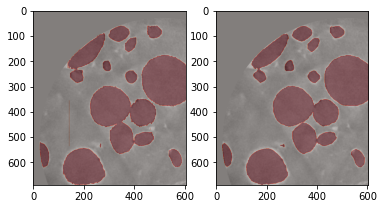

Done Distance Transform
Done Extended Minima
(201, 690, 603, 3)
(201, 690, 603)
Segmentation took 12.6 minutes


In [4]:
particles, masks, watershed = segm.process_segm()

In [5]:
#particles = eilnn.load_pickles('C:/Users/Sohrab/Documents/crack/eil-nn wip/particles_5V.txt', 0)
#masks = eilnn.load_pickles('C:/Users/Sohrab/Documents/crack/eil-nn wip/masks_5V.txt', 0)

In [11]:
test = eilnn.classifier('C:/Users/Sohrab/Documents/crack/eil-nn/model_binary', particles, masks, 'C:/Users/Sohrab/Documents/crack/eil-nn wip/test_export/test_1', save = 0)

In [7]:
print(watershed.shape)

(201, 690, 603)


1


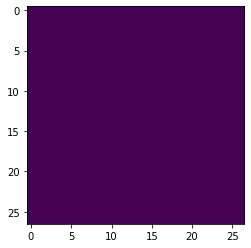

In [8]:
plt.imshow(masks[19][1,:,:])
print(np.unique(masks[19][1,:,:]).size)

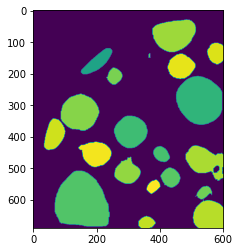

In [9]:
plt.imshow(watershed[200,:,:])

In [10]:
print(masks[0:0:0])

TypeError: unhashable type: 'slice'

(48,)


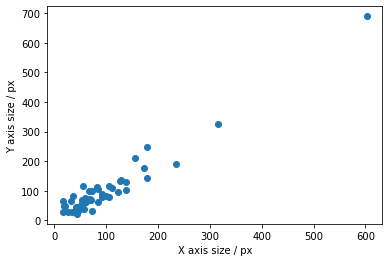

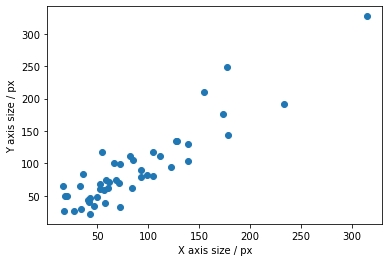

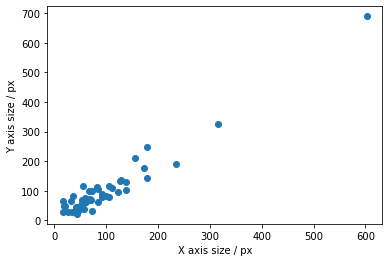

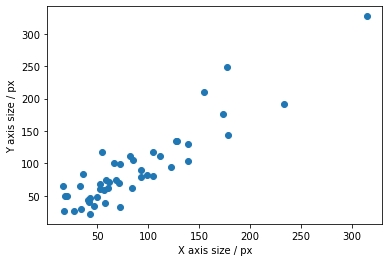

2 partial particles removed.
(43,)
0
1
2
3
4
5


C:\Users\Sohrab\anaconda3\envs\eilnn_v1\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
pristine    43
Name: Particle class, dtype: int64


In [12]:
test.classify_particles()

In [ ]:
for i in range(0, label_field.shape[0]):
    filename = "label_" + str(i) + ".tiff"
    save_path = os.path.join(out_dir, filename)
    cv2.imwrite(save_path, label_field_export[i, :, :])

In [ ]:
print(particles[1].shape)

In [ ]:
grayscale_stack = eilnn.load_grayscale(os.path.join(eilnn.IMAGES_DIR, 'test_gray_slices'))

In [ ]:
eilnn.save_pickles(particles, 'particles_s25_x.txt')

In [ ]:
eilnn.save_pickles(masks, 'masks_s13_x.txt')

In [ ]:
eilnn.save_label(watershed, 's25_watershed')

In [ ]:
print(background_val)

In [ ]:
plt.imshow(watershed[50,:,:])

In [ ]:
segmentation_2d = segm.segment_2d(model, grayscale_stack)

In [ ]:
print(segmentation_2d.shape)

In [ ]:
model_class =  keras.models.load_model(os.path.join(eilnn.PARENT_DIR, 'model_binary'))


In [ ]:
path = 'C:/Users/Sohrab/Documents/crack/EILNet_tf2/images/pristine_abs_3'

In [ ]:
test = eilnn.segment_classify(model, path, model_class, 8, export_path='C:/Users/Sohrab/Documents/crack/EILNet_tf2/images/pristine_abs_3/test/', save_particles = 1)

In [ ]:
test.process_segm_class()